<a href="https://colab.research.google.com/github/abhinendra88/Ted_talk_views_predictions/blob/main/Ted_talk__views_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##  **Project Name**   - Ted Talk Views Prediction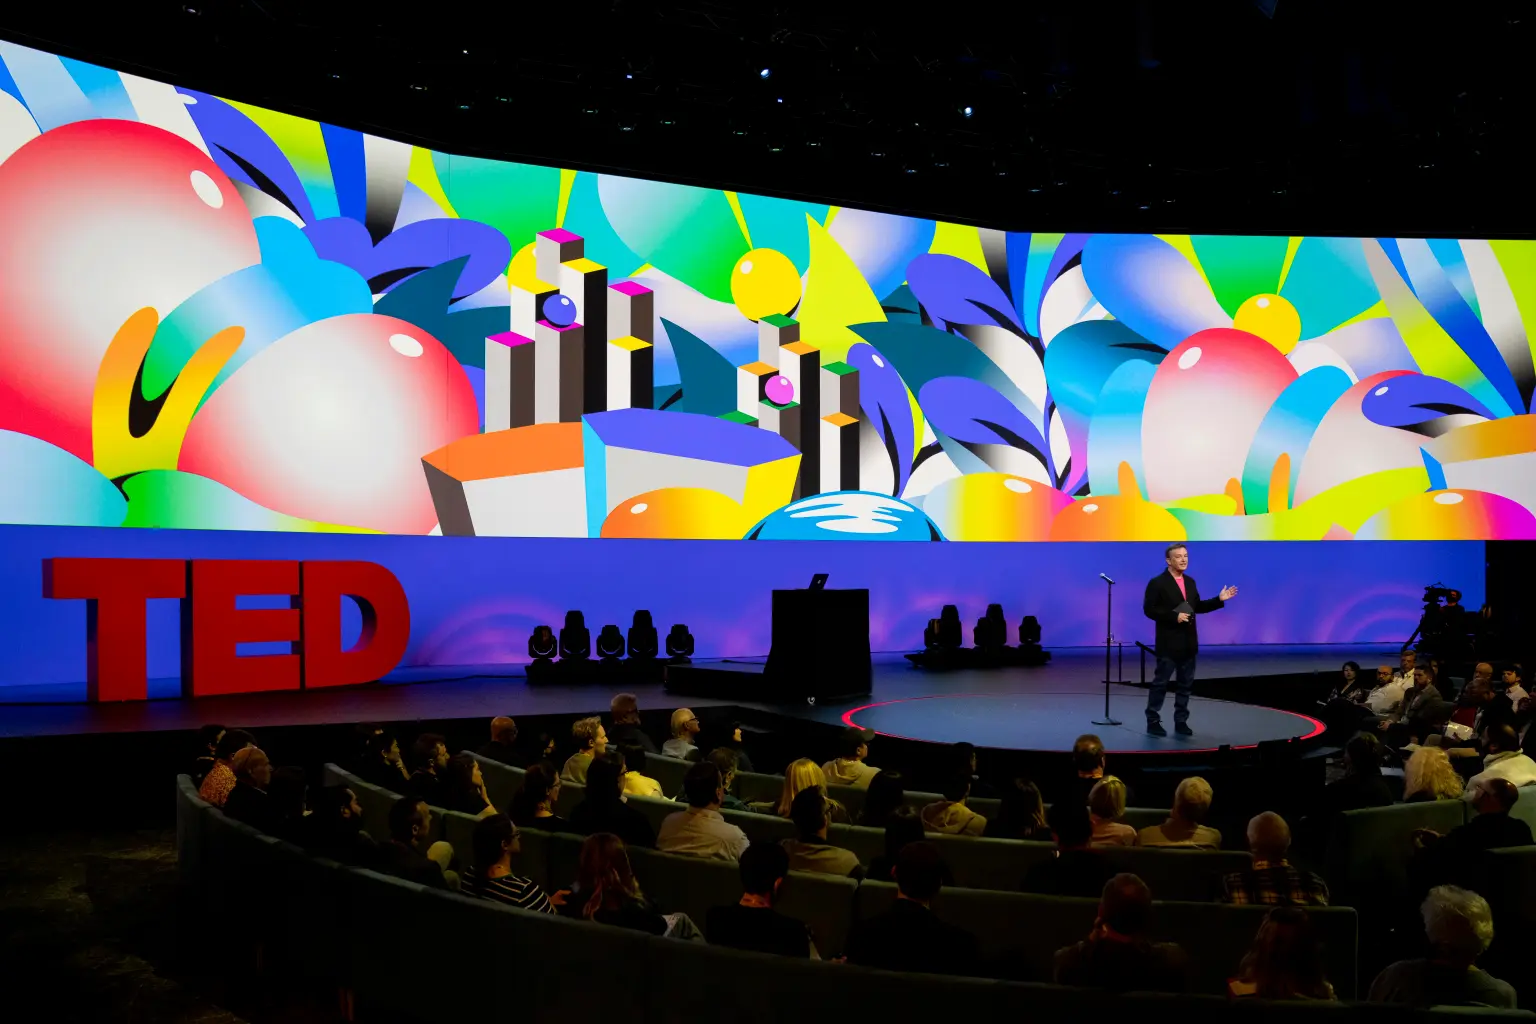

**Project Type**    - **Regression**
##### **Contribution**    - **Individual**
##### **Team Member 1 -** **Abhinendra singh**    

# **Project Summary -**


TED stands for Technology, Entertainment and Design.

TED is devoted to spreading powerful ideas on just about any topic. These datasets contain over 4,000 TED talks including transcripts in many languages.

Founded in 1984 by Richard Salman as a nonprofit organization that aimed at bringing experts from the fields of Technology, Entertainment, and Design together.

TED Conferences have gone on to become the Mecca of ideas from virtually all walks of life. As of 2015, TED and its sister TEDx chapters have published more than 2000 talks for free consumption by the masses and its speaker list boasts of the likes of Al Gore, Jimmy Wales, Shahrukh Khan, and Bill Gates.

Our main objective is to build a predictive model to predict the number of views for the respective videos from the TEDx website. As we have a continous variable to predict, we use regression models to predict the views of the TED talks.

# **GitHub Link -**

# **Problem Statement**


Our objective is to predict the views of a TED talk uploaded on the TEDx website. For this purpose; we have been provided with the following attributes which are to be used to predict the views on a particular video.

1-- Information about the Speakers

2-- Underlying topics of the video’s talk

3-- Type of Event in which the video was recorded

4-- Recorded and Published Date of the video

5-- Native language of the video and languages in which video is available

6-- Comments, Duration and web-address of the video
Related talks

7-- Description and Transcript of the video

**Features information:**

The dataset contains features like:


**talk_id**: Talk identification number provided by TED

**title**: Title of the talk

**speaker_1**: First speaker in TED's speaker list

**all_speakers**: Speakers in the talk

**occupations**: Occupations of the speakers

**about_speakers**: Blurb about each speaker

**recorded_date**: Date the talk was recorded

**published_date**: Date the talk was published to TED.com

**event**: Event or medium in which the talk was given

**native_lang**: Language the talk was given in

**available_lang:** All available languages (lang_code) for a talk

**comments:** Count of comments

**duration:** Duration in seconds

**topics:** Related tags or topics for the talk

**related_talks:** Related talks (key='talk_id',value='title')

**url:** URL of the talk

**description:** Description of the talk

**transcript**: Full transcript of the talk

# **General Guidelines** : -  

1.   Well-structured, formatted, and commented code is required.
2.   Exception Handling, Production Grade Code & Deployment Ready Code will be a plus. Those students will be awarded some additional credits.
     
     The additional credits will have advantages over other students during Star Student selection.
       
             [ Note: - Deployment Ready Code is defined as, the whole .ipynb notebook should be executable in one go
                       without a single error logged. ]

3.   Each and every logic should have proper comments.
4. You may add as many number of charts you want. Make Sure for each and every chart the following format should be answered.
        

```
# Chart visualization code
```
            

*   Why did you pick the specific chart?
*   What is/are the insight(s) found from the chart?
* Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

5. You have to create at least 15 logical & meaningful charts having important insights.


[ Hints : - Do the Vizualization in  a structured way while following "UBM" Rule.

U - Univariate Analysis,

B - Bivariate Analysis (Numerical - Categorical, Numerical - Numerical, Categorical - Categorical)

M - Multivariate Analysis
 ]





6. You may add more ml algorithms for model creation. Make sure for each and every algorithm, the following format should be answered.


*   Explain the ML Model used and it's performance using Evaluation metric Score Chart.


*   Cross- Validation & Hyperparameter Tuning

*   Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

*   Explain each evaluation metric's indication towards business and the business impact pf the ML model used.




















# ***Let's Begin !***

In [ ]:
# Import Libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from datetime import datetime
from sklearn.linear_model import Ridge, Lasso
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, ExtraTreesRegressor
from sklearn.neural_network import MLPRegressor
import xgboost as xgb
from sklearn import neighbors
from sklearn.svm import SVR
import time
from sklearn import metrics
from sklearn.metrics import mean_squared_error, r2_score,mean_absolute_error
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.model_selection import train_test_split, KFold
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn import ensemble

import warnings
warnings.filterwarnings("ignore")


### Dataset Loading

In [ ]:
# Load Dataset
# mount drive
from google.colab import drive
drive.mount('/content/drive')




Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [7]:
#loading the dataset and creating a dataframe
df=pd.read_csv('/content/drive/MyDrive/data_ted_talks.csv')

### Dataset First View

In [8]:
# Dataset First Look
df.head()

,talk_id,title,speaker_1,all_speakers,occupations,about_speakers,views,recorded_date,published_date,event,native_lang,available_lang,comments,duration,topics,related_talks,url,description,transcript
0,1,Averting the climate crisis,Al Gore,{0: 'Al Gore'},{0: ['climate advocate']},{0: 'Nobel Laureate Al Gore focused the world’...,3523392,2006-02-25,2006-06-27,TED2006,en,"['ar', 'bg', 'cs', 'de', 'el', 'en', 'es', 'fa...",272.0,977,"['alternative energy', 'cars', 'climate change...","{243: 'New thinking on the climate crisis', 54...",https://www.ted.com/talks/al_gore_averting_the...,With the same humor and humanity he exuded in ...,"Thank you so much, Chris. And it's truly a gre..."
1,92,The best stats you've ever seen,Hans Rosling,{0: 'Hans Rosling'},{0: ['global health expert; data visionary']},"{0: 'In Hans Rosling’s hands, data sings. Glob...",14501685,2006-02-22,2006-06-27,TED2006,en,"['ar', 'az', 'bg', 'bn', 'bs', 'cs', 'da', 'de...",628.0,1190,"['Africa', 'Asia', 'Google', 'demo', 'economic...","{2056: ""Own your body's data"", 2296: 'A visual...",https://www.ted.com/talks/hans_rosling_the_bes...,You've never seen data presented like this. Wi...,"About 10 years ago, I took on the task to teac..."
2,7,Simplicity sells,David Pogue,{0: 'David Pogue'},{0: ['technology columnist']},{0: 'David Pogue is the personal technology co...,1920832,2006-02-24,2006-06-27,TED2006,en,"['ar', 'bg', 'de', 'el', 'en', 'es', 'fa', 'fr...",124.0,1286,"['computers', 'entertainment', 'interface desi...","{1725: '10 top time-saving tech tips', 2274: '...",https://www.ted.com/talks/david_pogue_simplici...,New York Times columnist David Pogue takes aim...,"(Music: ""The Sound of Silence,"" Simon & Garfun..."
3,53,Greening the ghetto,Majora Carter,{0: 'Majora Carter'},{0: ['activist for environmental justice']},{0: 'Majora Carter redefined the field of envi...,2664069,2006-02-26,2006-06-27,TED2006,en,"['ar', 'bg', 'bn', 'ca', 'cs', 'de', 'en', 'es...",219.0,1116,"['MacArthur grant', 'activism', 'business', 'c...",{1041: '3 stories of local eco-entrepreneurshi...,https://www.ted.com/talks/majora_carter_greeni...,"In an emotionally charged talk, MacArthur-winn...",If you're here today — and I'm very happy that...
4,66,Do schools kill creativity?,Sir Ken Robinson,{0: 'Sir Ken Robinson'},"{0: ['author', 'educator']}","{0: ""Creativity expert Sir Ken Robinson challe...",65051954,2006-02-25,2006-06-27,TED2006,en,"['af', 'ar', 'az', 'be', 'bg', 'bn', 'ca', 'cs...",4931.0,1164,"['children', 'creativity', 'culture', 'dance',...","{865: 'Bring on the learning revolution!', 173...",https://www.ted.com/talks/sir_ken_robinson_do_...,Sir Ken Robinson makes an entertaining and pro...,Good morning. How are you? (Audience) Good. It...


### Dataset Rows & Columns count

In [9]:
# Dataset Rows & Columns count
df.shape


(4005, 19)

### Dataset Information

In [10]:
# Dataset Info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4005 entries, 0 to 4004
Data columns (total 19 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   talk_id         4005 non-null   int64  
 1   title           4005 non-null   object 
 2   speaker_1       4005 non-null   object 
 3   all_speakers    4001 non-null   object 
 4   occupations     3483 non-null   object 
 5   about_speakers  3502 non-null   object 
 6   views           4005 non-null   int64  
 7   recorded_date   4004 non-null   object 
 8   published_date  4005 non-null   object 
 9   event           4005 non-null   object 
 10  native_lang     4005 non-null   object 
 11  available_lang  4005 non-null   object 
 12  comments        3350 non-null   float64
 13  duration        4005 non-null   int64  
 14  topics          4005 non-null   object 
 15  related_talks   4005 non-null   object 
 16  url             4005 non-null   object 
 17  description     4005 non-null   o

#### Duplicate Values

In [11]:
# Dataset Duplicate Value Count
df.duplicated().sum()

0



* There are only 3 numerical columns in the dataset out of which 1 is target variable and 2 can be used as features and rest all columns are categorical columns.
* main goal here is to find or generate some numerical columns from these columns.



#### Missing Values/Null Values

In [12]:
# Missing Values/Null Values Count
df.isna().sum().sort_values(ascending=False)

comments          655
occupations       522
about_speakers    503
all_speakers        4
recorded_date       1
talk_id             0
description         0
url                 0
related_talks       0
topics              0
duration            0
event               0
available_lang      0
native_lang         0
title               0
published_date      0
views               0
speaker_1           0
transcript          0
dtype: int64

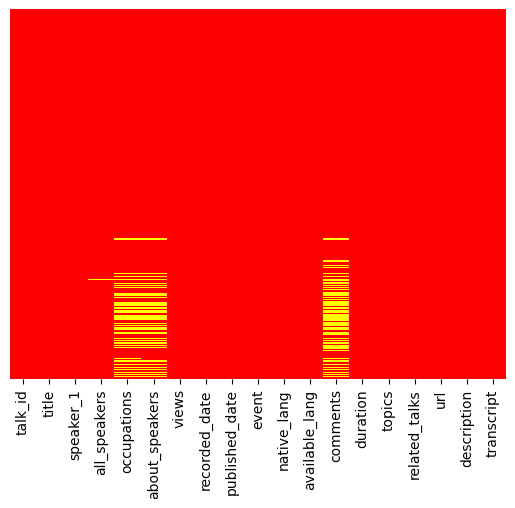

In [13]:
# Visualizing the missing values
sns.heatmap(df.isnull(),yticklabels=False,cbar=False,cmap='autumn')
plt.rcParams['figure.figsize'] = (20, 8)

### What did you know about your dataset?

The dataset contains NaN values in few columns like:



*   all_speakers
*   occupations
*   about_speakers
*   comments
*   recorded_date









## ***2. Understanding Your Variables***

In [14]:
# Dataset Columns
df.columns

Index(['talk_id', 'title', 'speaker_1', 'all_speakers', 'occupations',
       'about_speakers', 'views', 'recorded_date', 'published_date', 'event',
       'native_lang', 'available_lang', 'comments', 'duration', 'topics',
       'related_talks', 'url', 'description', 'transcript'],
      dtype='object')

In [15]:
# Dataset Describe
df.describe()

,talk_id,views,comments,duration
count,4005.000000,4.005000e+03,3350.000000,4005.000000
mean,12432.538327,2.148006e+06,161.997015,724.011236
std,17447.576262,3.451226e+06,268.838922,361.775462
min,1.000000,0.000000e+00,0.000000,60.000000
25%,1252.000000,8.820690e+05,38.000000,393.000000
50%,2333.000000,1.375508e+06,89.000000,738.000000
75%,23777.000000,2.133110e+06,188.000000,974.000000
max,62794.000000,6.505195e+07,6449.000000,3922.000000


### Check Unique Values for each variable.

In [16]:
# Check Unique Values for each variable.
variables_df = df.columns.to_list()

In [17]:
for i in variables_df:
  print('The Unique Values of', i, 'are:', df[i].unique())

The Unique Values of talk_id are: [    1    92     7 ... 62263 62784 62794]
The Unique Values of title are: ['Averting the climate crisis' "The best stats you've ever seen"
 'Simplicity sells' ... 'How "policing for profit" undermines your rights'
 'The electrifying speeches of Sojourner Truth'
 'The most important anus in the ocean']
The Unique Values of speaker_1 are: ['Al Gore' 'Hans Rosling' 'David Pogue' ... 'Dick M. Carpenter II'
 'Daina Ramey Berry' 'Cella Wright']
The Unique Values of all_speakers are: ["{0: 'Al Gore'}" "{0: 'Hans Rosling'}" "{0: 'David Pogue'}" ...
 "{0: 'Dick M. Carpenter II'}" "{0: 'Daina Ramey Berry'}"
 "{0: 'Cella Wright'}"]
The Unique Values of occupations are: ["{0: ['climate advocate']}"
 "{0: ['global health expert; data visionary']}"
 "{0: ['technology columnist']}" ...
 "{0: ['psychotherapist', 'psychosomatic psychiatrist']}"
 "{0: ['epidemiologist', 'philanthropist'], 1: ['head of ted']}"
 "{0: ['law researcher']}"]
The Unique Values of about_speake

## 3. ***Data Wrangling***

### Data Wrangling Code

In [18]:
# Write your code to make your dataset analysis ready.
#Dropping Url column
df = df.drop(columns=['url'])

In [19]:
#Replacing Null Values
df['occupations'].fillna('Not Present',inplace = True)
df['all_speakers'].fillna('No Speaker',inplace = True)
df['about_speakers'].fillna('Not Present',inplace = True)
df['comments'].fillna('No Comments',inplace = True)
df['recorded_date'].fillna('Not Present',inplace = True)

### What all manipulations have you done and insights you found?

 **Dropped the Url columns,as it had no use.
Cleaned the data and replaced the null values.So there no more null values.**

## ***4. Data Vizualization, Storytelling & Experimenting with charts : Understand the relationships between variables***

Chart - 1

**Who are the speakers of top 5 most watched TED talks?**

In [20]:
popular_df = df.nlargest(5, ['views'])
popular_df[['speaker_1','views','title']]

,speaker_1,views,title
4,Sir Ken Robinson,65051954,Do schools kill creativity?
1296,Amy Cuddy,57074270,Your body language may shape who you are
2062,James Veitch,56932551,This is what happens when you reply to spam email
646,Simon Sinek,49730580,How great leaders inspire action
796,Brené Brown,47544833,The power of vulnerability


<Axes: title={'center': "Speaker's of most popular videos"}, xlabel='speaker_1', ylabel='views'>

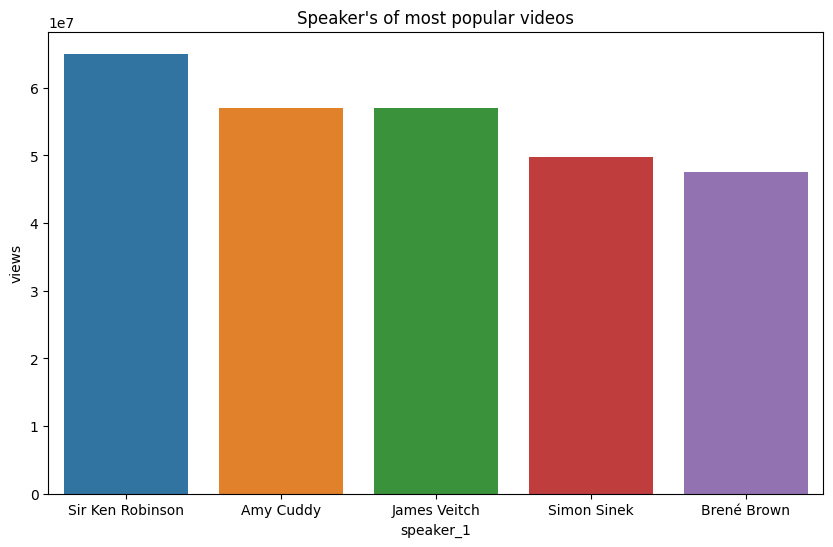

In [21]:
# Chart - 1 visualization code
plt.figure(figsize=(10,6))
plt.title("Speaker's of most popular videos")
sns.barplot(x='speaker_1', y='views', data=popular_df)

##### 1. Why did you pick the specific chart?

Because i wanted to check the speakers of top 5 most watched TED talks.

##### 2. What is/are the insight(s) found from the chart?

1--Sir Ken Robinson's talk on "Do Schools Kill Creativity?" is the most popular TED Talk with more than 65 million views.

2--There is only one talk that has crossed 60 million mark while 3 talks have crossed 50 million mark.Answer Here

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Yes.It will help to gain positive business impact.


#### Chart - 2

Who is the most popular speaker?

In [22]:
popular_speaker_df = df.groupby('speaker_1').agg({'views':'sum'}).nlargest(10,['views']).reset_index()
popular_speaker_df

,speaker_1,views
0,Alex Gendler,117619583
1,Sir Ken Robinson,84380518
2,James Veitch,78843641
3,Simon Sinek,62661183
4,Brené Brown,61285977
5,Bill Gates,57107176
6,Amy Cuddy,57074270
7,Julian Treasure,54799681
8,Hans Rosling,39871561
9,Tim Urban,37976820


<Axes: title={'center': 'Most popular Speaker according to total views'}, xlabel='speaker_1', ylabel='views'>

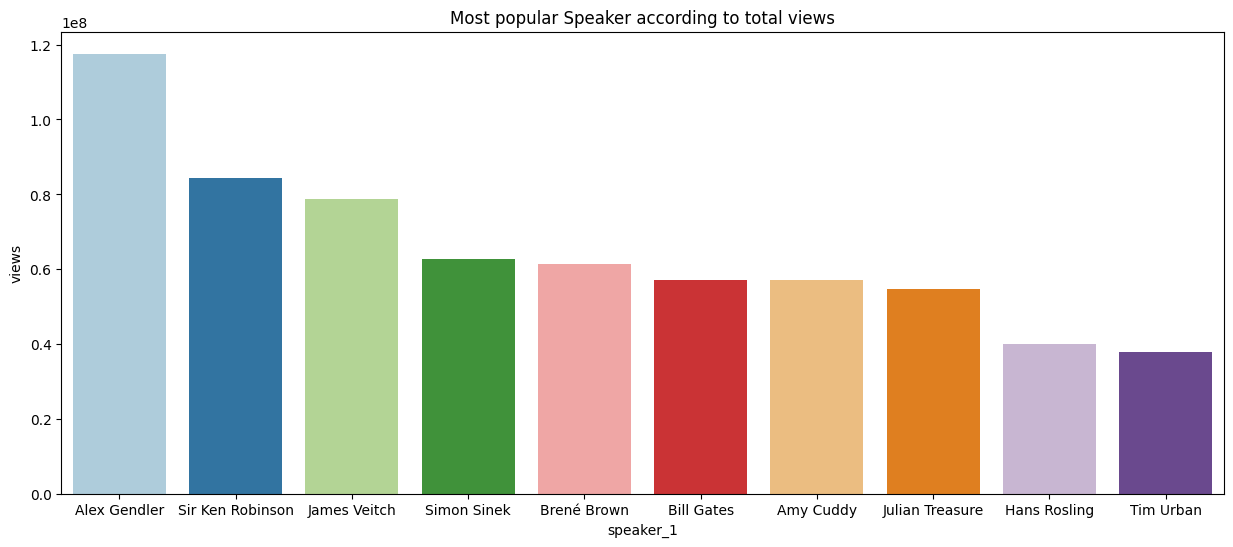

In [23]:
# Chart - 2 visualization code
plt.figure(figsize=(15,6))
plt.title('Most popular Speaker according to total views')
sns.barplot(x='speaker_1', y='views', data=popular_speaker_df,palette='Paired')

##### 1. Why did you pick the specific chart?

Because i wanted to check who is the most popular speaker.

##### 2. What is/are the insight(s) found from the chart?

Alex Gendler is the most popular speaker followed by Sir Ken Robinson and James veitch.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Yes.It will help to gain positive business impact.



#### Chart - 3

which is the most frequent and most popular event in TED?

In [31]:
#most_frequent_event
popular_event_df = df.groupby('event').agg({'views':'sum'}).nlargest(10,['views']).reset_index()
popular_event_df

,event,views
0,TED-Ed,1145357780
1,TED2015,247702961
2,TED2014,240295871
3,TEDGlobal 2013,235410234
4,TED2017,227847725
5,TED2016,227358612
6,TED2013,225967516
7,TED2012,197746106
8,TED2018,196346377
9,TED2009,191190144


In [29]:
#find most popular event
pop_event_df=df[['event','views']].groupby('event').agg({'views' : 'sum'}).nlargest(10,['views']).reset_index()
pop_event_df

,event,views
0,TED-Ed,1145357780
1,TED2015,247702961
2,TED2014,240295871
3,TEDGlobal 2013,235410234
4,TED2017,227847725
5,TED2016,227358612
6,TED2013,225967516
7,TED2012,197746106
8,TED2018,196346377
9,TED2009,191190144


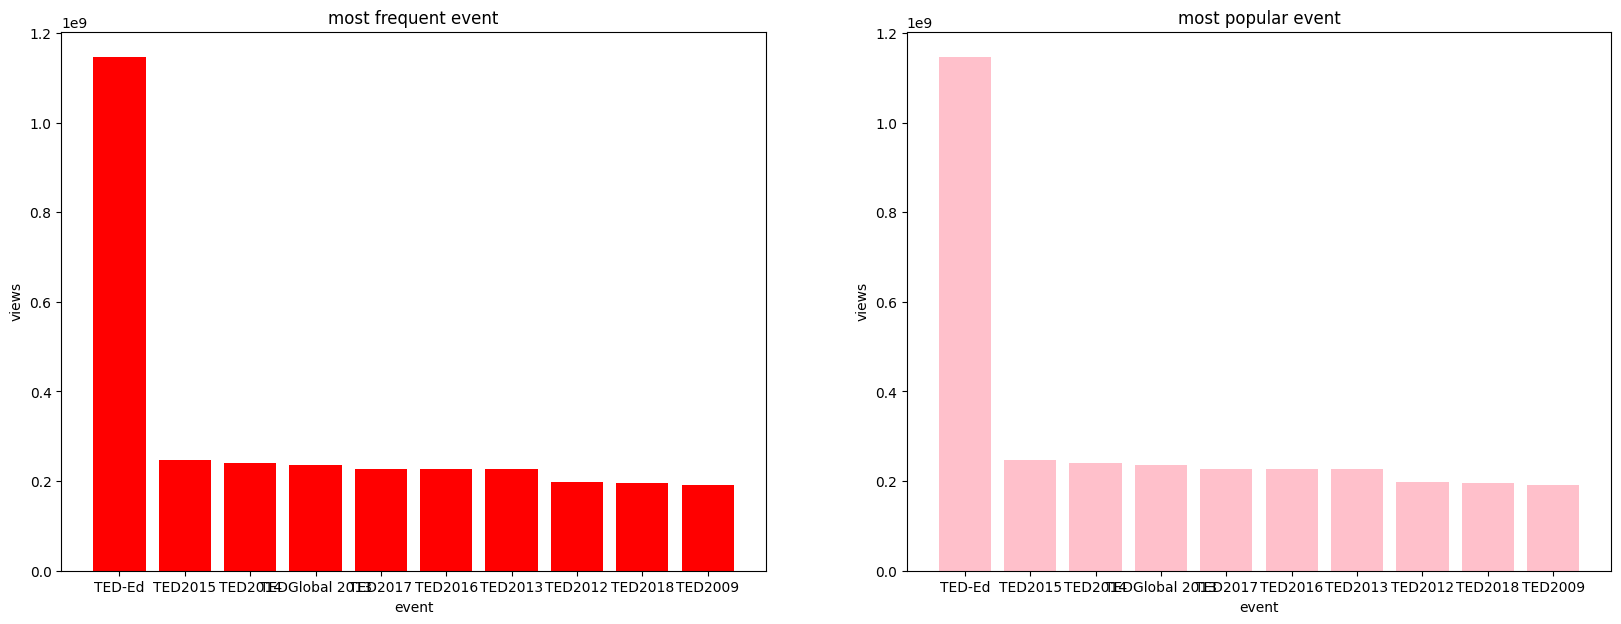

In [32]:
# Chart - 3 visualization code
# Plotting both graphs
#setting x and y values in the plot
x = popular_event_df['event']
y = popular_event_df['views']
x1 = pop_event_df['event']
y1 = pop_event_df['views']

plt.subplots(figsize=(20, 7))

# using subplot function and creating plot one
plt.subplot(1, 2, 1)
plt.bar(x, y, color='red')
plt.title('most frequent event')
plt.xlabel('event')
plt.ylabel('views')

# using subplot function and creating plot two
plt.subplot(1, 2, 2)
plt.bar(x1, y1,color='pink')
plt.title('most popular event')
plt.xlabel('event')
plt.ylabel('views')
# space between the plots
#plt.tight_layout(2)

# show plot
plt.show()

##### 1. Why did you pick the specific chart?

##### 2. What is/are the insight(s) found from the chart?

Majority of Titles contains words like life, world, make, new, future, art.

Because i wanted to check most frequent and popular shows on TED.

##### 2. What is/are the insight(s) found from the chart?

TED-Ed is the most popular and frequent event

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Yes.It will help to gain positive business impact.

#### Chart - 4

Which is  the most frequent words in the title?

In [36]:
#importing the wordcloud
from wordcloud import WordCloud,ImageColorGenerator

There are 157160 words in the combination of all titles.


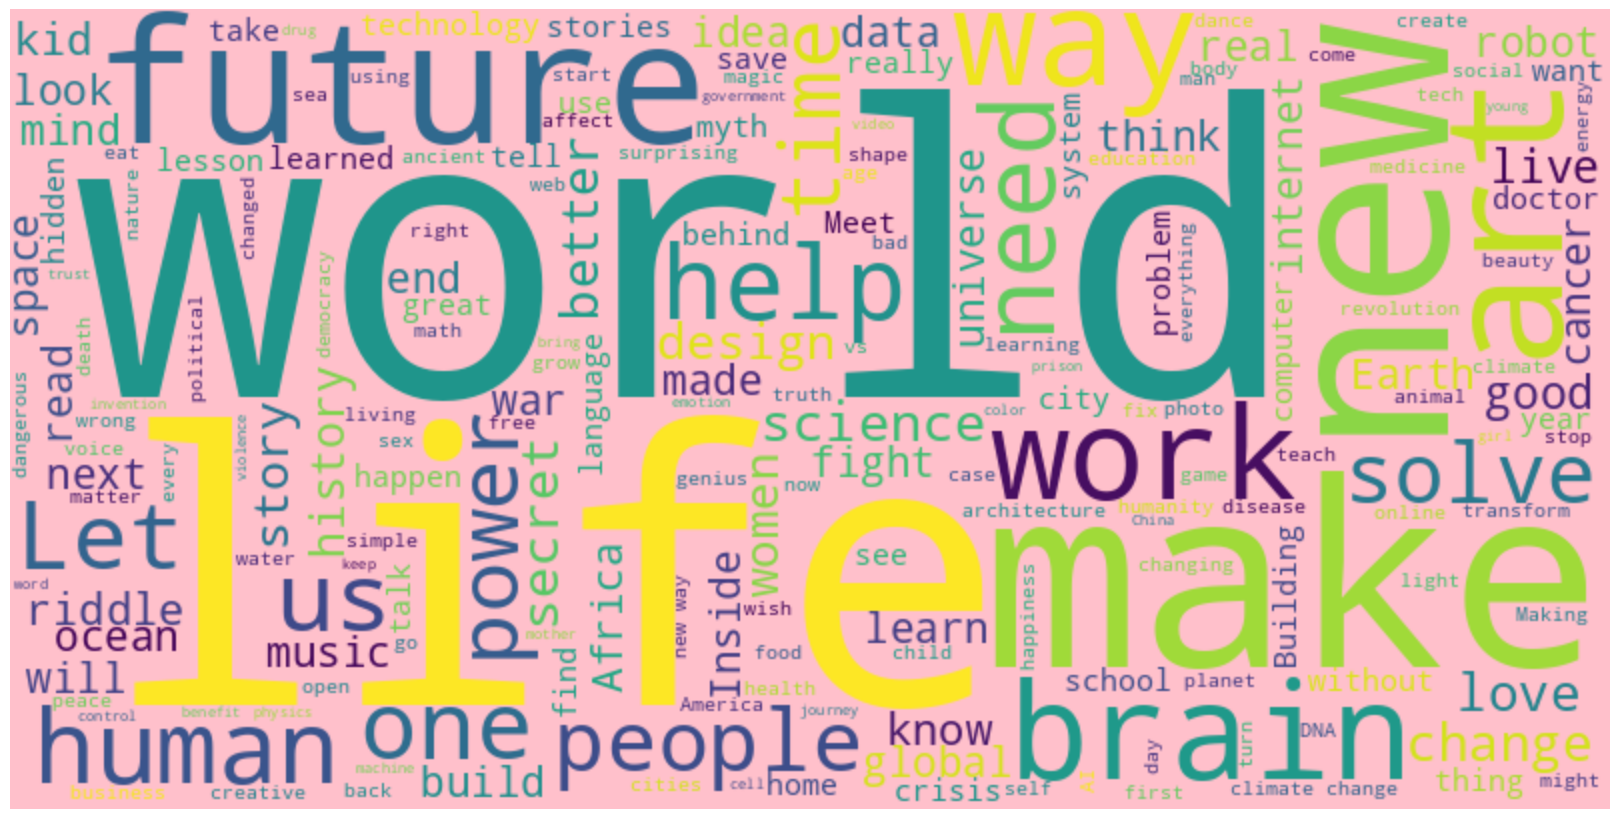

In [37]:
# Chart - 5 visualization code
#making of word cloud from title column
text = " ".join(topic for topic in df.title.astype(str))
print ("There are {} words in the combination of all titles.".format(len(text)))

# Create and generate a word cloud image:
wordcloud = WordCloud(background_color="pink", width=800, height=400).generate(text)

plt.axis("off")
plt.rcParams["figure.figsize"] = (15,5)
plt.tight_layout(pad=0)
plt.imshow(wordcloud, interpolation='bilinear')
plt.show()

##### 1. Why did you pick the specific chart?

To check which words are most used in the title.

##### 2. What is/are the insight(s) found from the chart?

Majority of Titles contains words like life, world, make, new, future, art.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Yes.It will help to gain positive business impact.



#### Chart - 6

Which is the most popular title with respect to views?

<Axes: xlabel='views', ylabel='title'>

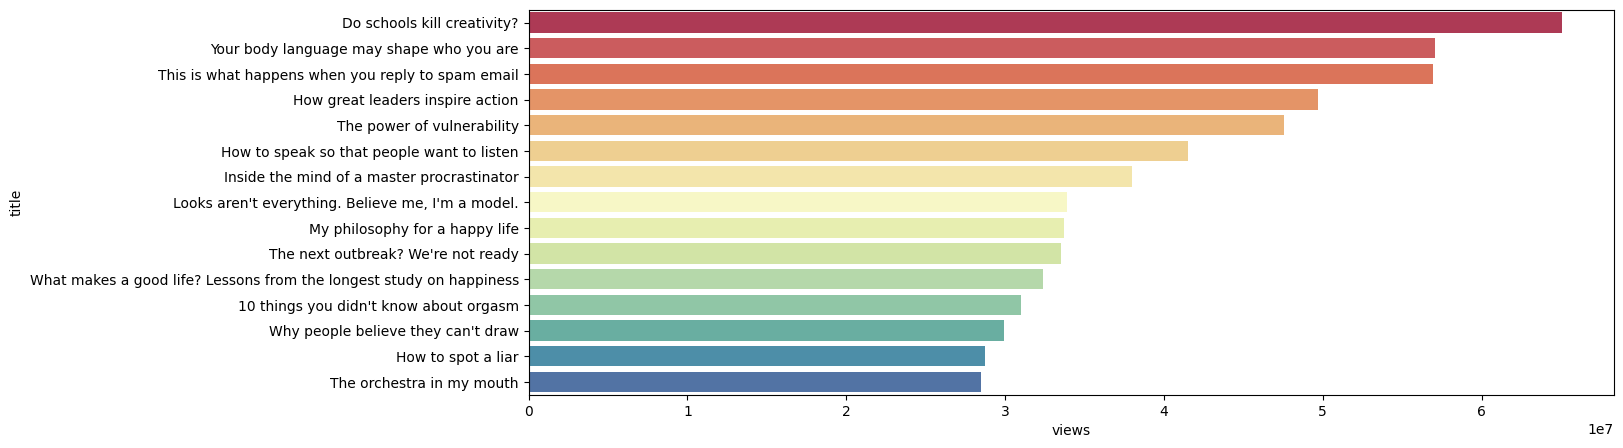

In [38]:
# Chart - 6 visualization code
popular_title = df[['title','views']].groupby('title').agg({'views' : 'mean'}).reset_index().sort_values(by=['views'],ascending=False).head(15)
plt.rcParams["figure.figsize"] = (14,5)
sns.barplot(x='views',y='title',data=popular_title,palette='Spectral')

#### Chart - 7

Extracting day,month and year from published_date column



In [39]:
#applying strptime on published_date column
import datetime
df['published_date'] = df['published_date'].apply(lambda x: datetime.datetime.strptime(x,"%Y-%m-%d"))

#extracting release day, month and year from the published date column
df['published_date_day'] = df['published_date'].apply(lambda x: x.weekday())
df['published_date_month']=df['published_date'].apply(lambda x: x.month)
df['published_date_year'] = df['published_date'].apply(lambda x: x.year)

In [40]:
#encoding of published_date_day column with corresponding week day name
week_day={0:'Monday',1:'Tuesday',2:'Wednesday',3:'Thursday',4:'Friday',5:'Saturday',6:'Sunday'}
df['published_date_day']=df['published_date_day'].map(week_day)

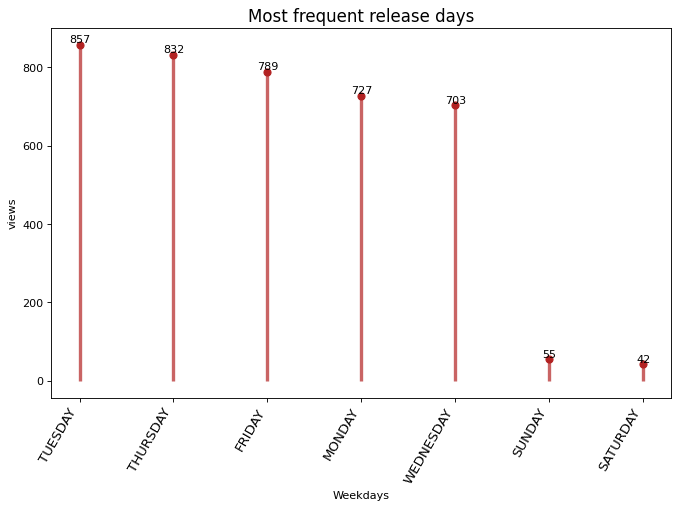

In [41]:
# Chart - 7 visualization code
#checking the day of the month having maximum release date
freq_rel_day=df[['published_date_day','views']].groupby('published_date_day').agg({'views' : 'count'})
freq_rel_day=freq_rel_day.sort_values('views',ascending=False)
freq_rel_day.reset_index(inplace=True)

# Plotting the graph
fig, ax = plt.subplots(figsize=(10,6), dpi= 80)
ax.vlines(x=freq_rel_day.index, ymin=0, ymax=freq_rel_day.views, color='firebrick', alpha=0.7, linewidth=3)
ax.scatter(x=freq_rel_day.index, y=freq_rel_day.views, s=40, color='firebrick', alpha=1)
ax.set_xticks(freq_rel_day.index)
ax.set_xticklabels(freq_rel_day.published_date_day.str.upper(), rotation=60, fontdict={'horizontalalignment': 'right', 'size':12})
plt.title("Most frequent release days",fontsize=15)
# Printing the count in graph
for row in freq_rel_day.itertuples():
    ax.text(row.Index, row.views+.5, s=round(row.views, 2), horizontalalignment= 'center', verticalalignment='bottom', fontsize=10)
# Show the object
plt.xlabel('Weekdays')
plt.ylabel('views')
plt.show()

##### 1. Why did you pick the specific chart?


To find the most frequent release date.

##### 2. What is/are the insight(s) found from the chart?


Most frequent releases are on Tuesday.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Yes.It will help to gain positive business impact.



#### Chart - 8

Which is the best release day of the week with respect to average views?

Text(0, 0.5, 'views')

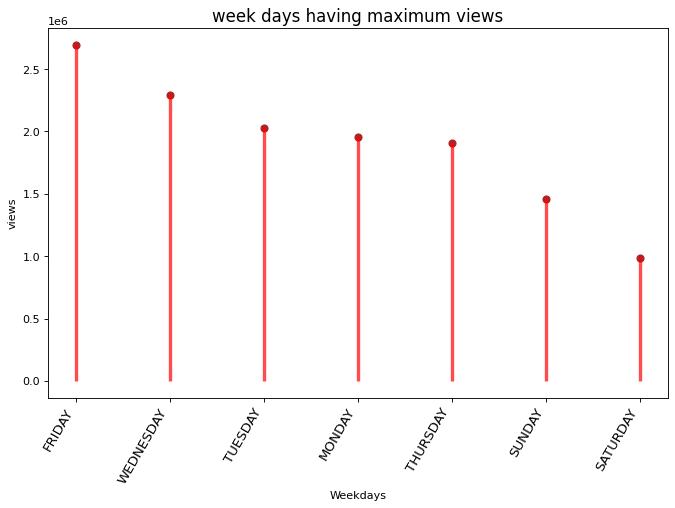

In [42]:
# Chart - 8 visualization code

#checking popular release day wrt views
pop_rel_day=df[['published_date_day','views']].groupby('published_date_day').agg({'views' : 'mean'})
pop_rel_day=pop_rel_day.sort_values('views',ascending=False)
pop_rel_day.reset_index(inplace=True)

# Plotting the graph
fig, ax = plt.subplots(figsize=(10,6), dpi= 80)
ax.vlines(x=pop_rel_day.index, ymin=0, ymax=pop_rel_day.views, color='red', alpha=0.7, linewidth=3)
ax.scatter(x=pop_rel_day.index, y=pop_rel_day.views, s=40, color='firebrick', alpha=1)
ax.set_xticks(pop_rel_day.index)
ax.set_xticklabels(pop_rel_day.published_date_day.str.upper(), rotation=60, fontdict={'horizontalalignment': 'right', 'size':12})
plt.title("week days having maximum views",fontsize=15)
plt.xlabel('Weekdays')
plt.ylabel('views')

##### 1. Why did you pick the specific chart?

To find the best release day of the week with respect to average views.

##### 2. What is/are the insight(s) found from the chart?

1--Most videos are published on Tuesday followed by Thursday.

2--But the videos published on Friday are more popular (i.e. have more average views) followed by wednesday.

3--Friday release is impacting the views of the video

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Yes.It will help to gain positive business impact.

#### Chart - 9

Which month has max releases?

In [43]:
#checking months having maximum release
freq_rel_month=df[['published_date_month','views']].groupby('published_date_month').agg({'views' : 'count'})
freq_rel_month=freq_rel_month.sort_values('views',ascending=False)
freq_rel_month.reset_index(inplace=True)
freq_rel_month

,published_date_month,views
0,4,423
1,3,419
2,2,412
3,10,350
4,1,348
5,9,347
6,5,312
7,6,310
8,11,305
9,7,278


In [44]:
#Printing the most popular release month according to average Views
pop_rel_month=df[['published_date_month','views']].groupby('published_date_month').agg({'views' : 'mean'})
pop_rel_month=pop_rel_month.sort_values('views',ascending=False)
pop_rel_month.reset_index(inplace=True)
pop_rel_month

,published_date_month,views
0,3,2.644200e+06
1,5,2.449977e+06
2,9,2.224862e+06
3,4,2.180815e+06
4,2,2.135949e+06
5,7,2.127899e+06
6,6,2.125505e+06
7,12,2.109443e+06
8,1,2.014319e+06
9,10,1.909282e+06


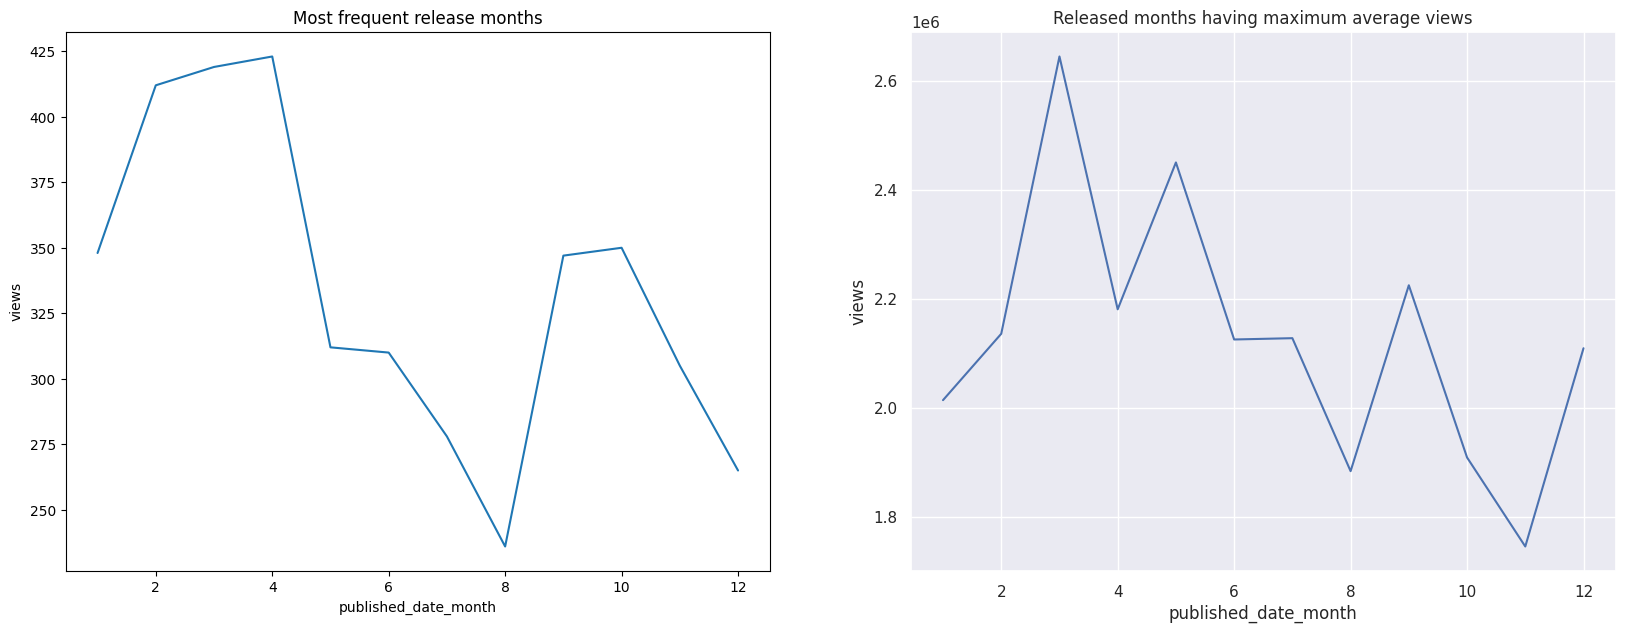

In [45]:
# Chart - 9 visualization code
# plotting the months having maximum release
plt.subplots(figsize=(20, 7))
plt.subplot(1,2,1)
sns.set_theme(style="darkgrid")
sns.lineplot(x='published_date_month',y='views',data=freq_rel_month)
plt.title('Most frequent release months')

#plotting most popular release month according to average Views
plt.subplot(1,2,2)
plt.title('Released months having maximum average views')
sns.lineplot(x='published_date_month',y='views',data=pop_rel_month)
plt.show()


##### 1. Why did you pick the specific chart?

To find which month has maximum releases and which month has maximum average views.

##### 2. What is/are the insight(s) found from the chart?

April have maximum released videos, But the videos released in March are more popular

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Yes.It will help to gain positive business impact.



#### Chart - 10

Which years have maximum releases?

In [46]:
df['release_year'] = df['published_date'].apply(lambda x: x.year)

In [47]:
freq_rel_year=df[['release_year','views']].groupby('release_year').agg({'views' : 'count'})
freq_rel_year=freq_rel_year.sort_values('views',ascending=False)
freq_rel_year.reset_index(inplace=True)

Text(0.5, 1.0, 'Most frequent release years')

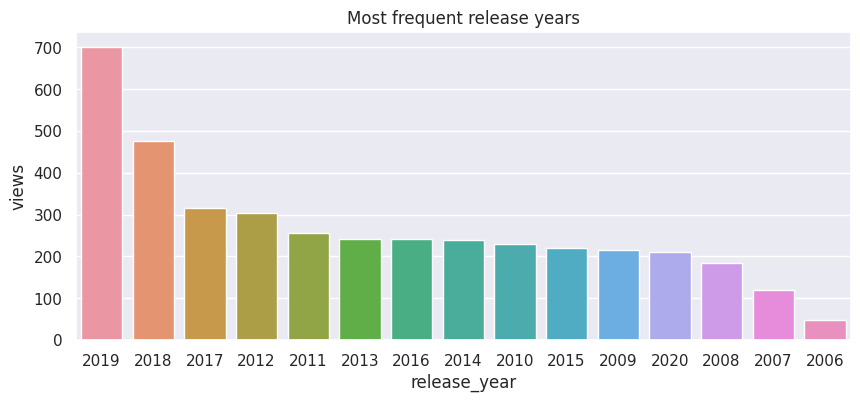

In [48]:
# Chart - 10 visualization code
plt.figure(figsize=(10,4))
sns.barplot(x='release_year',y='views',data=freq_rel_year, order=freq_rel_year.sort_values('views',ascending = False).release_year)
plt.title('Most frequent release years')

##### 1. Why did you pick the specific chart?

To check which is the most frequent release year.

##### 2. What is/are the insight(s) found from the chart?

Most videos are published in 2019 followed by 2018 and 2017.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Yes.It will help to gain positive business impact.

#### Chart - 11

Which is the most popular release years according to average views?

In [49]:
pop_rel_year=df[['release_year','views']].groupby('release_year').agg({'views' : 'mean'})
pop_rel_year=pop_rel_year.sort_values('views',ascending=False)
pop_rel_year.reset_index(inplace=True)


<Axes: title={'center': 'Released years having maximum average views'}, xlabel='release_year', ylabel='views'>

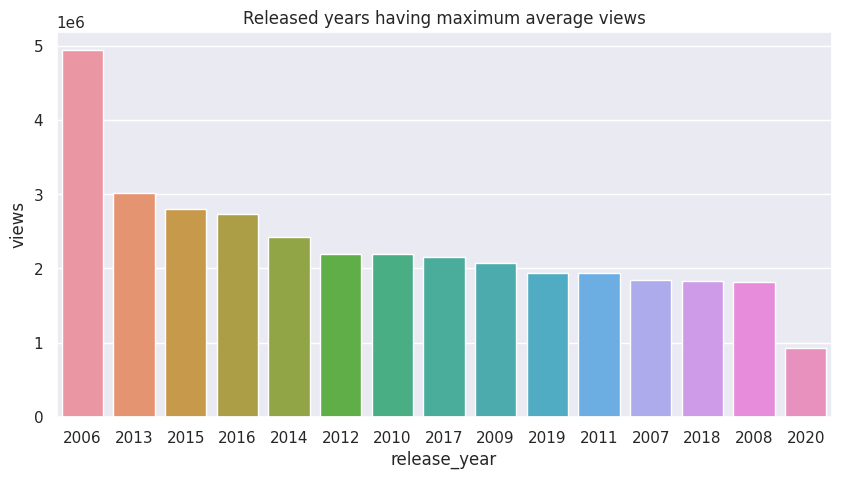

In [50]:
# Chart - 11 visualization code
plt.figure(figsize=(10,5))
plt.title('Released years having maximum average views')
sns.barplot(x='release_year',y='views', data=pop_rel_year, order=pop_rel_year.sort_values('views',ascending =False).release_year)

##### 1. Why did you pick the specific chart?

To find the most popular release years according to average views.

##### 2. What is/are the insight(s) found from the chart?

The videos published in 2006 are most viewed followed by 2013 and 2015.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Yes.It will help to gain positive business impact.

#### Chart - 12 - Correlation Heatmap

<Axes: >

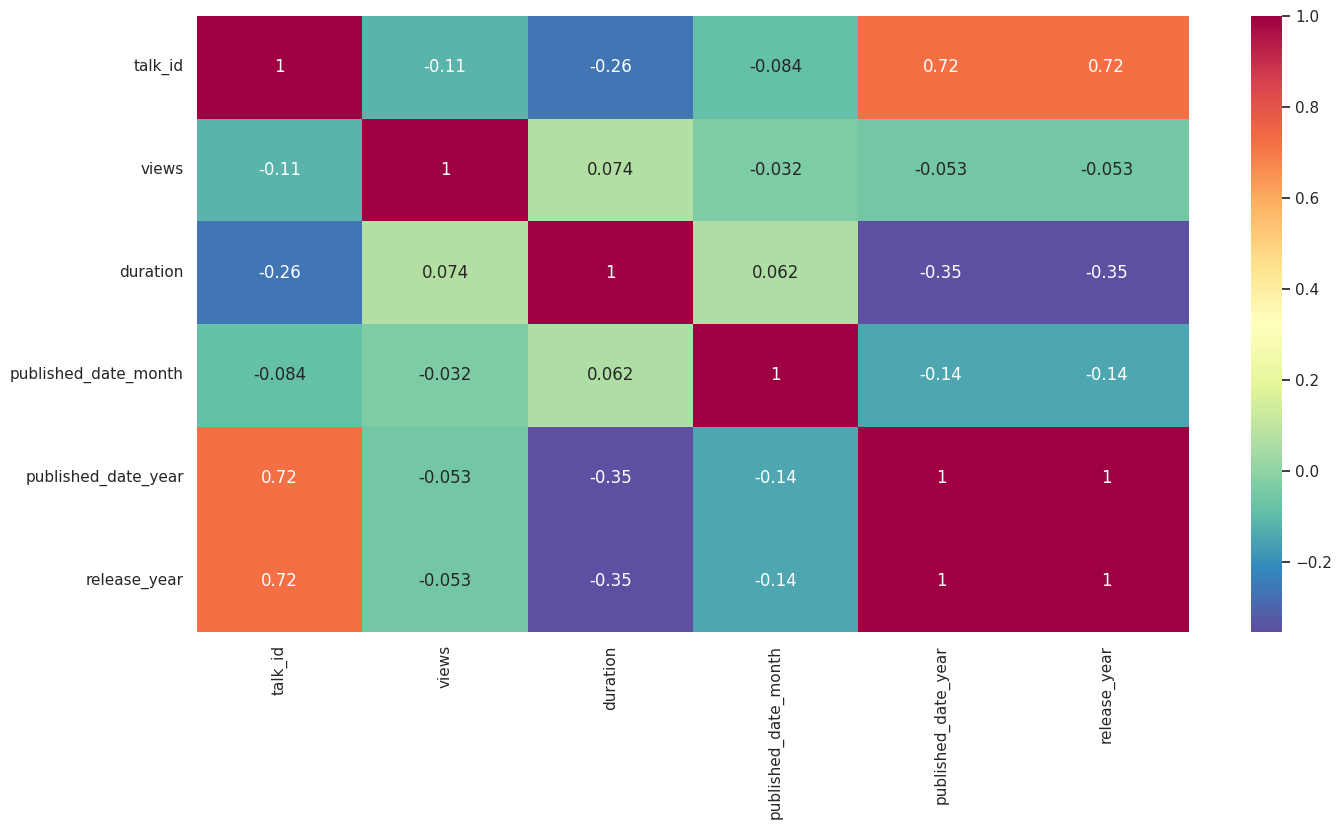

In [51]:
# Correlation Heatmap visualization code
fig = plt.figure(figsize=(16,8))
ax = fig.add_subplot(111)
sns.heatmap(df.corr(),annot=True, cmap='Spectral_r')

##### 1. Why did you pick the specific chart?

Heat map gives us better understanding of correaltion.